# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json
import seaborn as sns

# Read data

In [2]:
covid_df = pd.read_csv('../data/final_data.csv')
covid_df.head()

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl,lat,lon
0,Afghanistan,2023-03-02,209359,19,7896.0,0.0,191166.0,10,10297.0,45,1201475.0,40754388,Asia,195,33.768006,66.238514
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195,33.768006,66.238514
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195,33.768006,66.238514
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514


# Analytics for data visualization

### **Question 5: Is there any country that has not recorded a new infection in the last 7 days??**
- There are many steps to answer this question:
    - First, we need to find the last 7 days of the data.
    - Second, we need to find the countries that have not recorded a new infection in the last 7 days.
    - Last, we need to visualize the result.

#### **Step 1. Find the last 7 days of the data.**

In [3]:
covid_df = covid_df.loc[(covid_df['Date'] >= '2023-03-03') & (covid_df['Date'] <= '2023-03-10')]
covid_df.head(10)

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl,lat,lon
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195,33.768006,66.238514
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195,33.768006,66.238514
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195,33.768006,66.238514
5,Afghanistan,2023-03-07,209415,21,7896.0,0.0,191243.0,10,10276.0,45,1202868.0,40754388,Asia,195,33.768006,66.238514
6,Afghanistan,2023-03-08,209441,26,7896.0,0.0,191262.0,19,10283.0,45,1203414.0,40754388,Asia,195,33.768006,66.238514
7,Afghanistan,2023-03-09,209451,10,7896.0,0.0,191272.0,10,10283.0,45,1203807.0,40754388,Asia,195,33.768006,66.238514
8,Afghanistan,2023-03-10,209484,2,7896.0,0.0,191284.0,4,10304.0,45,1204573.0,40754388,Asia,195,33.768006,66.238514
10,Albania,2023-03-03,334427,19,3597.0,1.0,329169.0,17,1661.0,0,1941032.0,2866374,Europe,9,41.000028,19.999962
11,Albania,2023-03-04,334427,0,3597.0,0.0,329169.0,0,1661.0,0,1941032.0,2866374,Europe,9,41.000028,19.999962


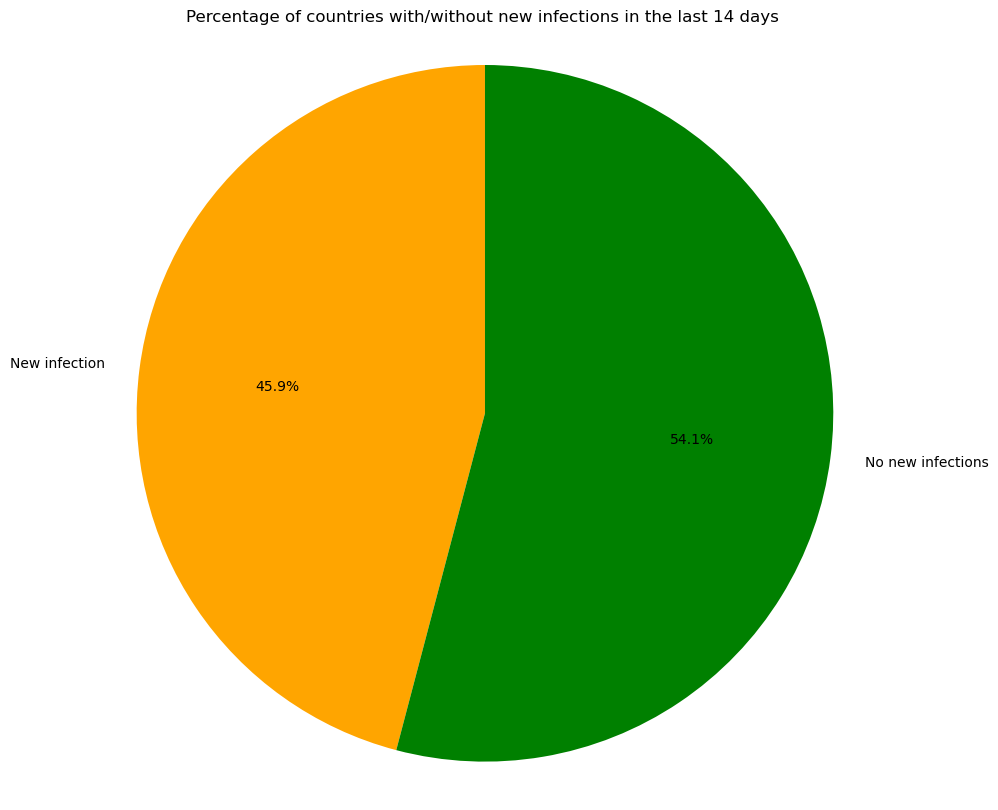

In [4]:
# Calculate the number of countries with and without new infections in the last 14 days
has_new_cases = covid_df[covid_df["NewCases"] > 0]["Country"].nunique()
no_new_cases = covid_df[covid_df["NewCases"] == 0]["Country"].nunique()

# Create a pie chart
labels = ["New infection", "No new infections"]
sizes = [has_new_cases, no_new_cases]
colors = ["orange", "green"]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage of countries with/without new infections in the last 14 days")
plt.show()

- **Comment on the results.**
    - The pie chart shows the percentage of countries with no new infections in the last 7 days and it accounts for 54.1% of the total number of countries. This shows that there are many countries that have not had a new infection in the last 7 days.
    - This shows that COVID-19 is well under control in a lot of countries. And now prevention and vaccination is essential to prevent the spread of COVID-19 and countries have done a great job in this regard.